In [1]:
%matplotlib inline

from numpy import *               
from scipy.sparse import diags	        # Greate diagonal matrices
from scipy.linalg import solve	        # Solve linear systems
from matplotlib.pyplot import *     	
from mpl_toolkits.mplot3d import Axes3D  # For 3-d plot
from matplotlib import cm 
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)
from numpy import *

## Implementation
For simplicity, the implementation below is only done for BVPs with constant
coefficients, that is $p(x)=p$ and $q(x)=q$. This makes the diagonal, sub- and
super-diagonals constant, except at the first and the last row.  
An extra function is included to construct matrices of the form $A =
\text{tridiag}\{v,d,w\}$. 

The implementation consist of
1. Choose $N$, let $h=(b-a)/N$ and $x_i=a+ih$, $i=0,\dotsc,N$.

2. Construct the matrix $A\in \mathbb{R}^{N+1\times N+1}$ and the vector $b\in\mathbb{R}^{N+1}$. The matrix $A$ is tridiagonal, and except from the first and last row, has the elements  $v=1-\frac{h}{2}p$ below the diagonal, $d = -2 + h^2 q$ as diagonal elements and  $w = 1+\frac{h}{2}p$ above the diagonal. 

3. Construct the vector $\mb{b} = [b_0,\dotsc,b_N]^T$ with elements $b_i=h^2r(x_i)$ for $i=1,\dotsc,N-1$.

4. Modify the first and the last row of the matrix $A$ and the first and last element of the vector $\mb{b}$, depending on the boundary conditions. 

5. Solve the system $A\mb{U} = \mb{b}$.

In [61]:
def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = ones(N)        # array [1,1,...,1] of length N
    A = v*diag(e[1:],-1)+d*diag(e)+w*diag(e[1:],1)
    return A

In [62]:
# Modified BVP Example for Exercise 4 of the Exercise Sheet 1

# Define the equation 
# u'' + p*u' + q*u = r(x) on the interval [a,b]
# Boundary condition: u(a)=ua and u(b)=ub

p = 2
q = pi**2
def r(x):
    return cos(pi*x)-pi*(x+1)*sin(pi*x)
a, b = 0, 2
ua, ub = 0, 1

# The exact solution (if known)
def u_eksakt(x):
    return x*cos(pi*x)/2

# Set up the discrete system
N = 40                      # Number of intervals                  

# Start the discretization  
h = (b-a)/N                # Stepsize
x = linspace(a, b, N+1)    # The gridpoints x_0=a, x_1=a+h, .... , x_N=b 

# Make a draft of the A-matrix (first and last row have to be adjusted)
v = 1-0.5*h*p              # Subdiagonal
d = -2+h**2*q              # Diagonal
w = 1+0.5*h*p              # Superdiagonal
A = tridiag(v, d, w, N+1)  

# Make a draft of the b-vector
b = h**2*r(x)  

# Modify the first equation (left boundary) 
A[0,0] = 1
A[0,1] = 0
b[0] = ua
        
# Modify the last equation (right boundary)   
A[N,N] = 1              
A[N,N-1] = 0
b[N] = ub


U = solve(A, b)     #  Solve the equation

To verify the calculations done above, print the matrix $A$, the vector $\mb{b}$ and the numerical solution $\mb{U}$.

In [63]:
# Print the matrix A, the right hand side b the numerical and exact solution
print('A =\n', A)                 
print('\nb =\n ', b)
print('\nU =\n ', U)
print('\nu(x)=\n', u_eksakt(x))

A =
 [[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.95       -1.97532599  1.05       ...  0.          0.
   0.        ]
 [ 0.          0.95       -1.97532599 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -1.97532599  1.05
   0.        ]
 [ 0.          0.          0.         ...  0.95       -1.97532599
   1.05      ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]

b =
  [ 0.00000000e+00  1.17915577e-03 -2.92073888e-04 -1.87296169e-03
 -3.51720301e-03 -5.17423764e-03 -6.79074287e-03 -8.31225473e-03
 -9.68487009e-03 -1.08569787e-02 -1.17809725e-02 -1.24148796e-02
 -1.27238711e-02 -1.26815919e-02 -1.22712710e-02 -1.14865734e-02
 -1.03321607e-02 -8.82393745e-03 -6.98896751e-03 -4.86505601e-03
 -2.50000000e-03  4.94776500e-05  2.71908769e-03  5.43859474e-03
  8.13365758e-03  1.07278413e-02  1.31447475e-02  1.53102036e-02
  1.71544505e-02  1.86142648e-02  1.96349541e-02  2.01721657e-02
  2.01934516e-

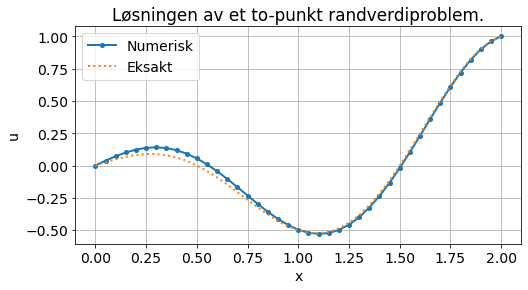

In [64]:
# Plot the solution of the BVP
xe = linspace(0,2,101)
plot(x,U,'.-')
plot(xe, u_eksakt(xe),':')              
xlabel('x')
ylabel('u')
legend(['Numerisk','Eksakt'])
title('Løsningen av et to-punkt randverdiproblem.');

Max error = 5.669e-02


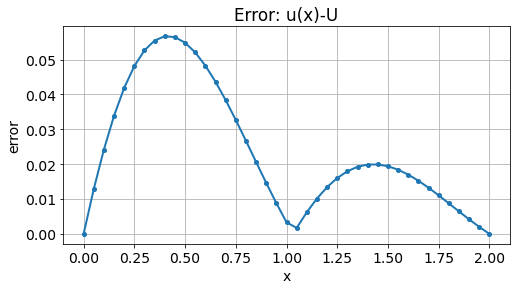

In [65]:
# Plot the error |u(x)-U| in the gridpoints
error = abs(u_eksakt(x)-U)
plot(x, error,'.-')
xlabel('x')
ylabel('error')
title('Error: u(x)-U');
print('Max error = {:.3e}'.format(max(abs(error))))